<a href="https://colab.research.google.com/github/BhanuPShahi/-Taxi-Mobility-Surge-Price-Prediction/blob/main/Bhanu_P_Shahi_10_05_2021_%5BTeam_2%5D_Capstone_Project_2_Taxi_Mobility_Surge_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Taxi Mobility Surge Price Prediction**

Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download their app on smartphones and book a cab from anywhere in the cities they operate in. They, in turn, search for cabs from various service providers and provide the best option to their clients across available options. They have been in operation for a little less than a year now. During this period, they have captured surge pricing types from the service providers.
The main objective is to build a predictive model, which could help them in predicting the surge pricing type proactively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.
* Trip_ID: ID for TRIP
* Trip_Distance: The distance for the trip requested by the customer
* TypeofCab: Category of the cab requested by the customer
* CustomerSinceMonths: Customer using cab services since n months; 0 month means the current month
* LifeStyleIndex: Proprietary index created by Sigma Cabs showing the lifestyle of the customer based on their behaviour
* ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above
* Destination_Type: Sigma Cabs divides any destination into one of the 14 categories.
* Customer_Rating: Average of lifetime ratings of the customer till date
CancellationLast1Month: Number of trips cancelled by the customer in last 1 month
* Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes
* Gender: Gender of the customer
* SurgePricingType: Target (can be of 3 types) - DV


##**Types of Pricing**
* Static Pricing
* Dynamic Pricing(Surge Pricing)

##**Reasons for surge pricing**
The reasons for surge pricing are:
* normal peak-hours
* bad weather conditions (rain, snow, etc)
* events (concerts, movie-premiere)
* traffic conditions
* unseen emergencies and so on.

#**How Surge pricing works**

##Demand for rides increases
There are times when so many people are requesting rides that there aren’t enough cars on the road to help take them all. Bad weather, rush hour, and special events, for instance, may cause unusually large numbers of people to want to request a ride with Uber all at the same time.

##Prices go up
In these cases of very high demand, prices may increase to help ensure that those who need a ride can get one. This system is called surge pricing, and it lets the Uber app continue to be a reliable choice.

##Riders pay more or wait
Whenever rates are raised due to surge pricing, the Uber app lets riders know. Some riders will choose to pay, while some will choose to wait a few minutes to see if the rates go back down.

#How are surge prices calculated?

* The cab platforms adjust their prices using a
specific algorithm which is real time and dynamic known
as “Surge Pricing” or “Dynamic Pricing”. 
* This algorithm automatically raises the price of a trip when the demand
increases more than the supply.
* The surge algorithm generally outputs a multiplier which is adjusted along
with the base fare, the price per mile and the price per
minute to generate the final price.
* This price is communicated to the riders and the ride is initiated when
they confirm to the price shown.
* This **surge multiplier** is kept discrete and may range from 1.2 to the maximum
allowed by the government based on geography. As in india Surge prices cannot be 50% more than the base fare.

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Loading the data set

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Capstone Projects/Taxi Mobility Surge Price Prediction/data_sigma_cabs.csv'
df=pd.read_csv(path)

#**Exploratory Data Analysis**

In [ ]:
#shape of data
df.shape

(131662, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [ ]:
df.head(2)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.905,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.450,0,38.0,56,78,Male,2


In [ ]:
df.Surge_Pricing_Type.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


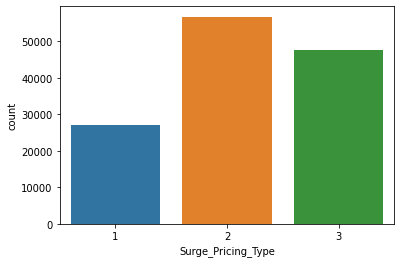

In [ ]:
sns.countplot(df['Surge_Pricing_Type'])

In [ ]:
df.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


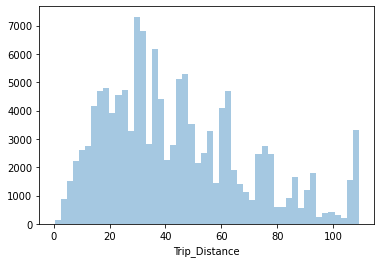

In [ ]:
sns.distplot(df['Trip_Distance'],kde = False,norm_hist=False)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


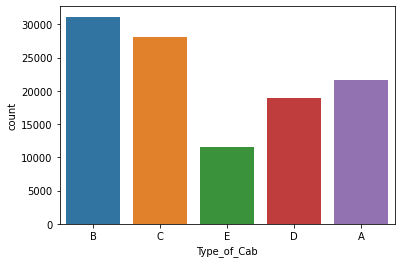

In [ ]:
sns.countplot(df['Type_of_Cab'])

* A,B,C,D,E are the categories of cab
* B type cab is in majority.

In [ ]:
df['Customer_Since_Months'].value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


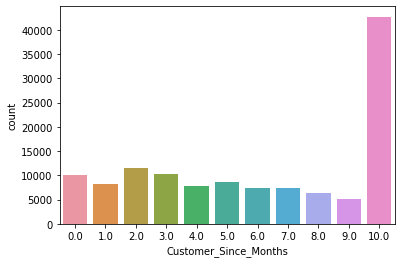

In [ ]:
sns.countplot(df['Customer_Since_Months'])

In [ ]:
df['Destination_Type'].value_counts()

A    77597
B    29555
C     7484
D     6588
E     2717
F     1950
G     1489
H     1260
I      813
J      695
K      680
L      643
N       98
M       93
Name: Destination_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


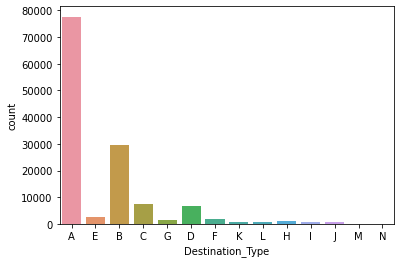

In [ ]:
sns.countplot(df['Destination_Type'])

In [ ]:
df.Cancellation_Last_1Month.value_counts()

0    68687
1    36834
2    16223
3     7142
4     1823
5      668
6      266
7       16
8        3
Name: Cancellation_Last_1Month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


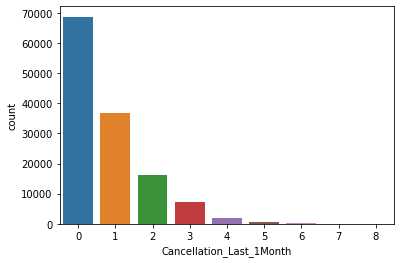

In [ ]:
sns.countplot(df.Cancellation_Last_1Month)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


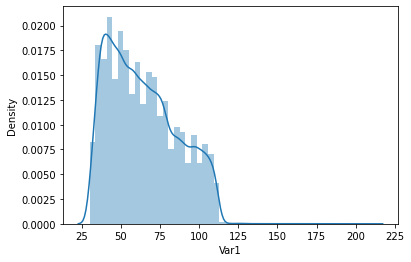

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


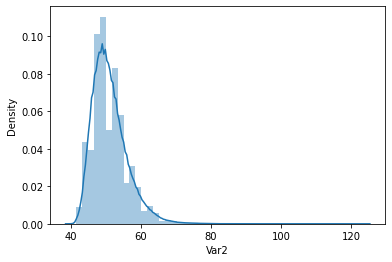

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


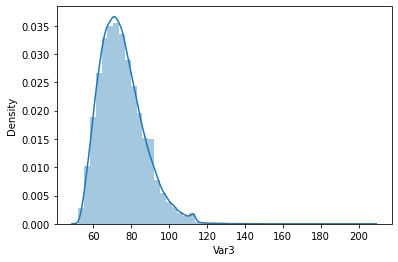

In [ ]:
var = [df['Var1'],df['Var2'],df['Var3']]
for variables in var:
    sns.distplot(variables)
    plt.show()

In [ ]:
df.Gender.value_counts()

Male      93900
Female    37762
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


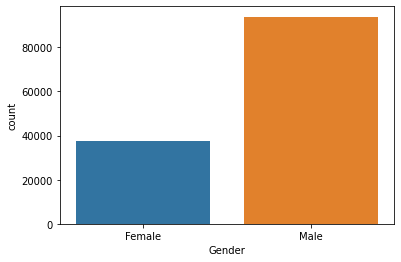

In [ ]:
sns.countplot(df['Gender'])

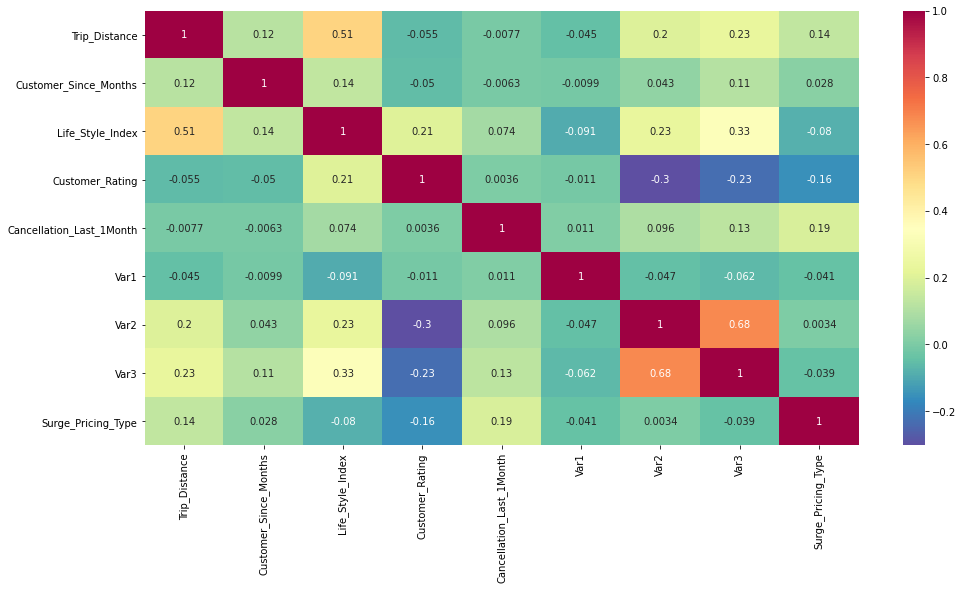

In [ ]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True, cmap='Spectral_r')